<a href="https://colab.research.google.com/github/satanimeet/SpamDetection/blob/main/nameentity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install transformers datasets torch matplotlib seaborn pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 39.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [3]:
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load pre-trained pipelines
ner_pipeline = pipeline("ner", model="dslim/bert-base-NER", grouped_entities=True)
sentiment_pipeline = pipeline("sentiment-analysis")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.NONE"` instead.
  warnings.warn(



Named Entities Table:

                                                Sentence                                                                               Entities
Elon Musk founded SpaceX and Tesla in the United States. [(El, PER), (on, ORG), (Musk, PER), (SpaceX, ORG), (Tesla, ORG), (United States, LOC)]
            Angela Merkel was the Chancellor of Germany.                                                 [(Angela Merkel, PER), (Germany, LOC)]
             Sundar Pichai leads Google from California.                               [(Sundar Pichai, PER), (Google, ORG), (California, LOC)]
   Cristiano Ronaldo plays for Al-Nassr in Saudi Arabia.                       [(Cristiano Ronaldo, PER), (Al-Nassr, ORG), (Saudi Arabia, LOC)]
                 Apple Inc. released the iPhone in 2007.                                                     [(Apple Inc, ORG), (iPhone, MISC)]
         Barack Obama served as President in Washington.                                               [(Barack 

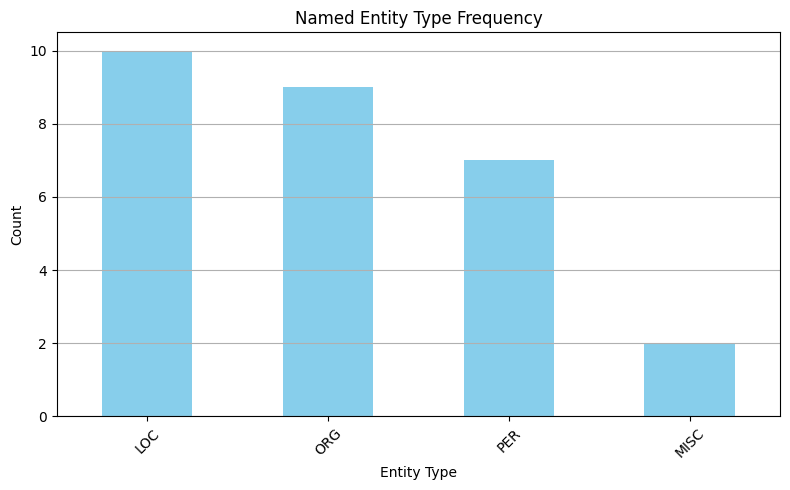

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline

# Load NER pipeline
ner_pipeline = pipeline("ner", model="dslim/bert-base-NER", grouped_entities=False)

# Custom merge function for tokens
def result(ner_output):
    result = []
    current_entity = []
    current_group = None
    prev_end = None

    for token in ner_output:
        word = token['word']
        if word.startswith('##'):
            word = word[2:]

        entity = token['entity']
        group = entity.split("-")[-1]

        if current_entity and (group != current_group or (prev_end is not None and token["start"] - prev_end > 1)):
            result.append(("".join(current_entity), current_group))
            current_entity = []

        if current_entity and token['start'] == prev_end:
            current_entity.append(word)
        else:
            if current_entity:
                current_entity.append(" " + word)
            else:
                current_entity = [word]

        current_group = group
        prev_end = token['end']

    if current_entity:
        result.append(("".join(current_entity), current_group))

    return result

# Custom sentences
custom_sentences = [
    "Elon Musk founded SpaceX and Tesla in the United States.",
    "Angela Merkel was the Chancellor of Germany.",
    "Sundar Pichai leads Google from California.",
    "Cristiano Ronaldo plays for Al-Nassr in Saudi Arabia.",
    "Apple Inc. released the iPhone in 2007.",
    "Barack Obama served as President in Washington.",
    "Netflix is headquartered in Los Gatos.",
    "The Eiffel Tower is located in Paris, France.",
    "Toyota is a Japanese car company.",
    "Amazon was founded by Jeff Bezos in Seattle."
]

# Run NER and organize results
rows = []
entity_types = []

for sentence in custom_sentences:
    ner_out = ner_pipeline(sentence)
    merged_entities = result(ner_out)
    rows.append({"Sentence": sentence, "Entities": merged_entities})
    entity_types.extend([entity[1] for entity in merged_entities])  # collect entity types

# Create DataFrame
df = pd.DataFrame(rows)

# Print table
print("\nNamed Entities Table:\n")
print(df.to_string(index=False))

# Visualization: Count of each entity type
entity_counts = pd.Series(entity_types).value_counts()

# Plot
plt.figure(figsize=(8, 5))
entity_counts.plot(kind='bar', color='skyblue')
plt.title("Named Entity Type Frequency")
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


